
---

**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the 3rd cell. 

I started by reading in all the `vehicle` and `non-vehicle` images.  
Here is an example of one of each of the `vehicle` class:
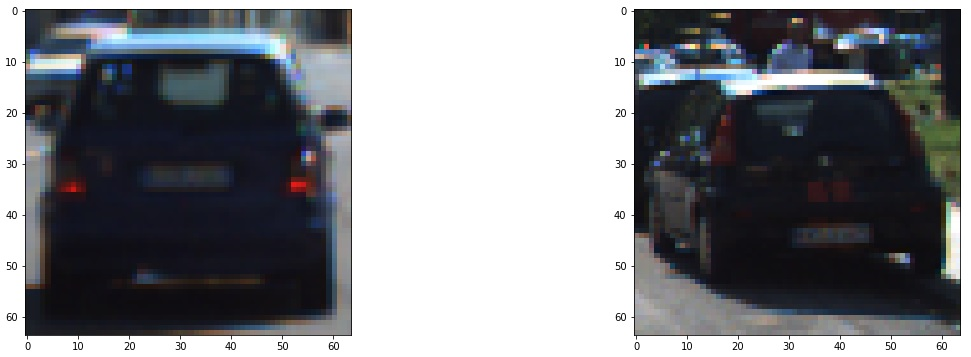



Here is an example of one of each of the `non-vehicle` class:
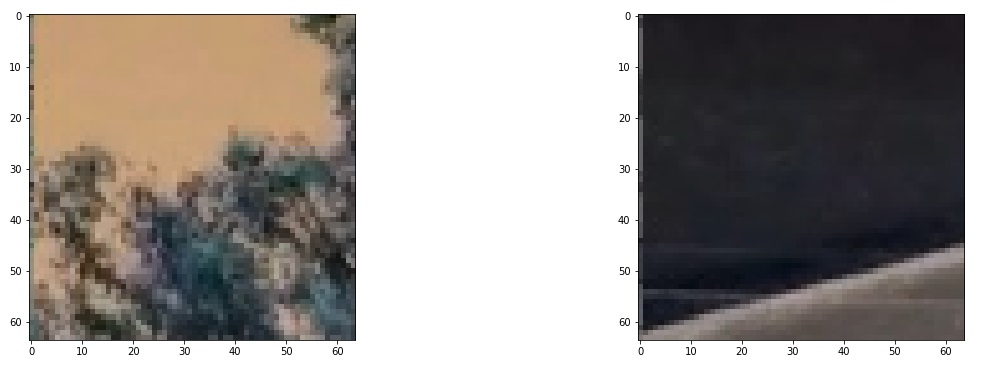

I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=9`, `pixels_per_cell=(12, 12)` and `cells_per_block=(2, 2)`:
## Car Image
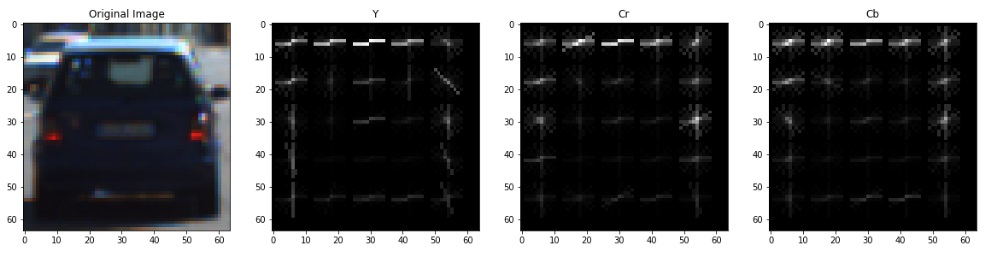

## Non Car Image
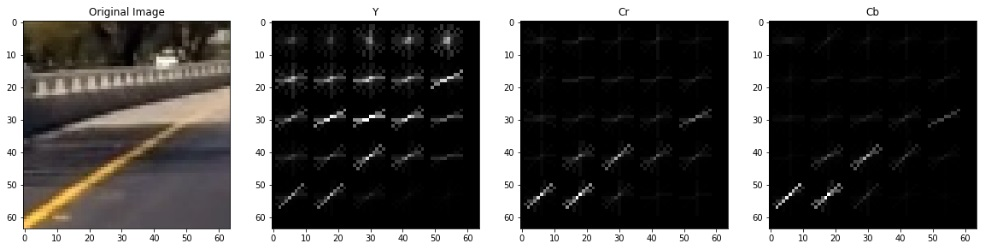

#### 2. Explain how you settled on your final choice of HOG parameters.

Value initialisation is in cell 2.
I tried various combination of values for parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`). For `orientations`- 9 to 13 ,`pixels_per_cell` - (10,10) to (16,16) and `cells_per_block` (2,2) to (4,4) and observed result. The best result I got for above mentioned parameter values.

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

The code for this is in cell 8.
I used linear SVM to classify the images of car and non-car objects. I had extracted the HOG,Spatially binned color and Histogram of color features from all the images. And then I split into train and test set. I used `sklearn.preprocessing.StandardScaler` library to standardize features and scaling to unit variance.

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to search with 8 scales.
scale = (1.0,1.25,1.5,2,2.5,3,1,1.25)
Position = ((400,464),(400,480),(400,496),(400,528),(400,560),(400,592),(410,474),(410,485))

As most of the car was appearing in this region so I went for this scale and positions. Code for this is in cell 15
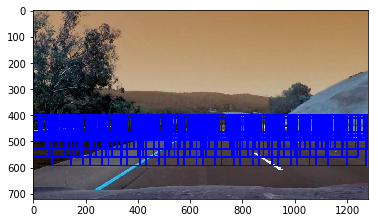

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Code for this is in cell 15.
I searched each frame on 8 scale using YCrCB color space and extracting HOG features,spatially binned color and histograms of color in the feature vector.
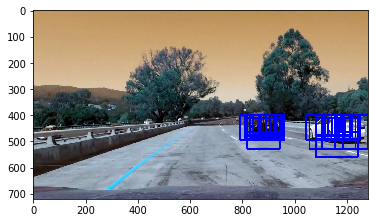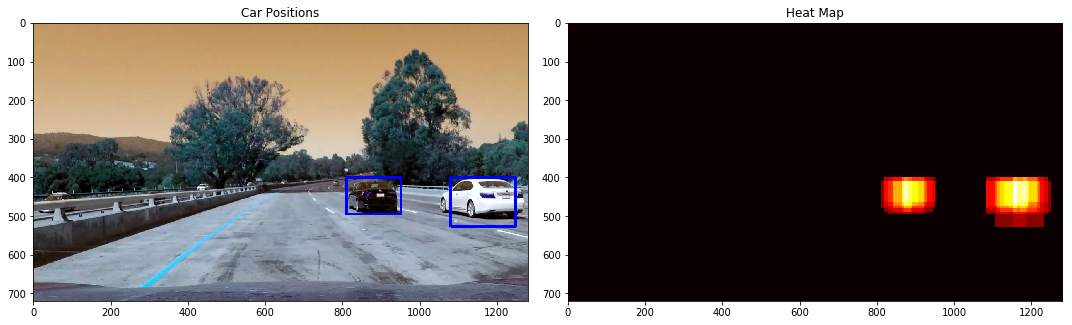

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
[Output_Video](output.mp4)

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

Code for this is in cell 16,17
I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:
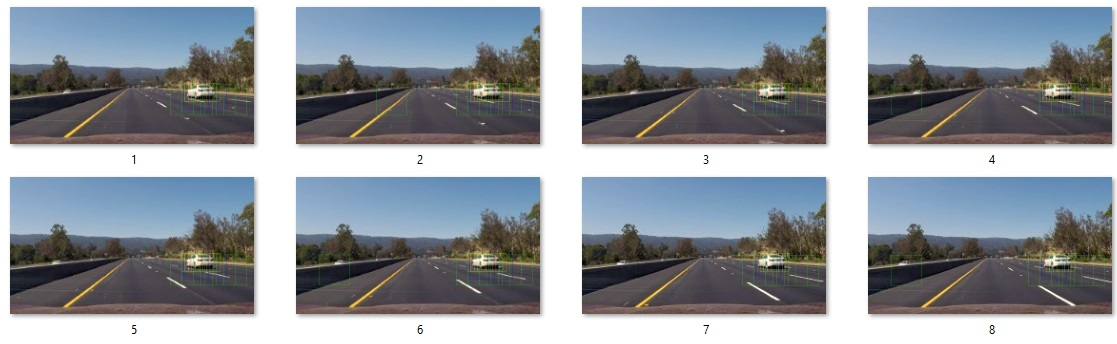

### Here are six frames and their corresponding heatmaps:
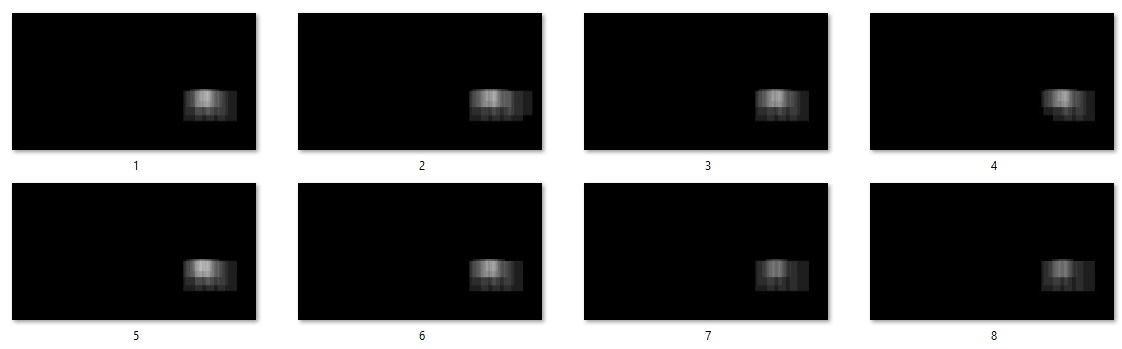

### Here the resulting bounding boxes are drawn onto the last frame in the series:
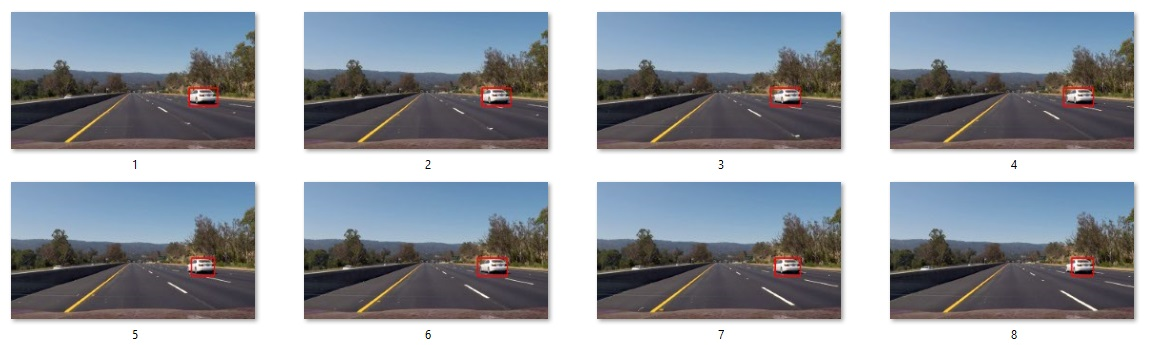

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

* I choose YCrCb-3 channel because it was not working well with other colorspaces.
* I choose to extract feature of HOG,spatially binned color, colorspace because it was not working well with extracting feature for only 1 or 2 of them.
* I am using linear svc as it was not working well with 'rbf' kernel for SVM in my case. Might some other combination of parameter work well for 'rbf'. Another reason to avoid is it's slowness.
* False detection was the main challenge so I used history of the heatmap to remove it.
